In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [5]:
loanpred = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\loan_prediction.csv')
loanpred.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

In [6]:
loanpred.shape

(614, 13)

In [8]:
loanpred.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
loanpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
loanpred.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [12]:
loanpred.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loanpred.isnull().sum().sum()

149

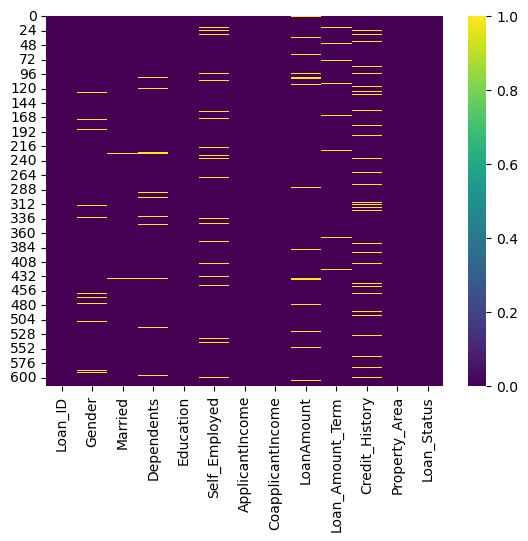

In [14]:
# Check if there is any missing value

sns.heatmap(loanpred.isnull(), cmap='viridis')
plt.show()

There are so many columns having missing values they need to be treated as per requirement .

In [15]:
loanpred.nunique().to_frame('unique values')

,unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [16]:
loanpred.drop('Loan_ID',axis=1, inplace=True)
loanpred.shape

(614, 12)

In [17]:
#object datatypes
object_datatypes=[]
for x in loanpred.dtypes.index:
    if loanpred.dtypes[x]=='O':
      object_datatypes.append(x)
print('object datatype = ',object_datatypes)    
    
    
#number_datatyped
number_datatypes=[]
for x in loanpred.dtypes.index:
    if loanpred.dtypes[x]=='float64' or loanpred.dtypes[x]=='int64':
        number_datatypes.append(x)
print('number datatype = ',number_datatypes)        

object datatype =  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
number datatype =  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [18]:
for col in object_datatypes:
    print(col)
    print(loanpred[col].value_counts())
    print("="*120)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


# Fill the missing value

In [19]:
#filling the Missing value with mean if data is continous 
loanpred['LoanAmount']=loanpred['LoanAmount'].fillna(loanpred['LoanAmount'].mean())

#filling the missing value with mode if data are catagorical
loanpred['Gender']=loanpred['Gender'].fillna(loanpred['Gender'].mode()[0])
loanpred['Married']=loanpred['Married'].fillna(loanpred['Married'].mode()[0])
loanpred['Dependents']=loanpred['Dependents'].fillna(loanpred['Dependents'].mode()[0])
loanpred['Credit_History']=loanpred['Credit_History'].fillna(loanpred['Credit_History'].mode()[0])
loanpred['Loan_Amount_Term']=loanpred['Loan_Amount_Term'].fillna(loanpred['Loan_Amount_Term'].mode()[0])
loanpred['Self_Employed']=loanpred['Self_Employed'].fillna(loanpred['Self_Employed'].mode()[0])

In [20]:
loanpred.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\1196371280.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


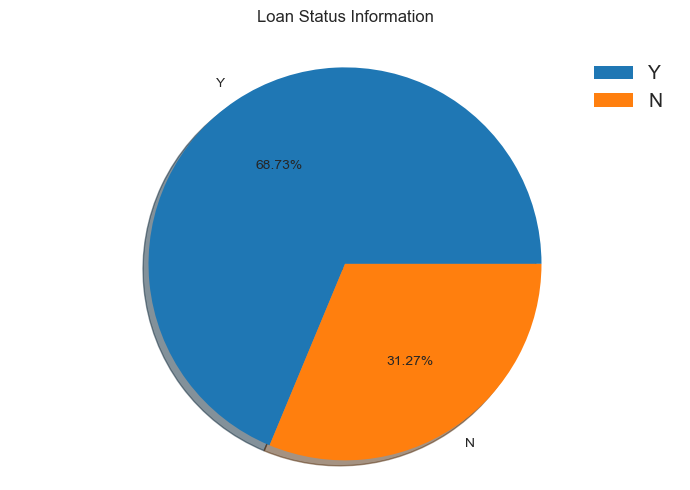

In [21]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(loanpred['Loan_Status'].value_counts(), labels=loanpred['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Approved loan is 68.73% and 31.27% is rejected.

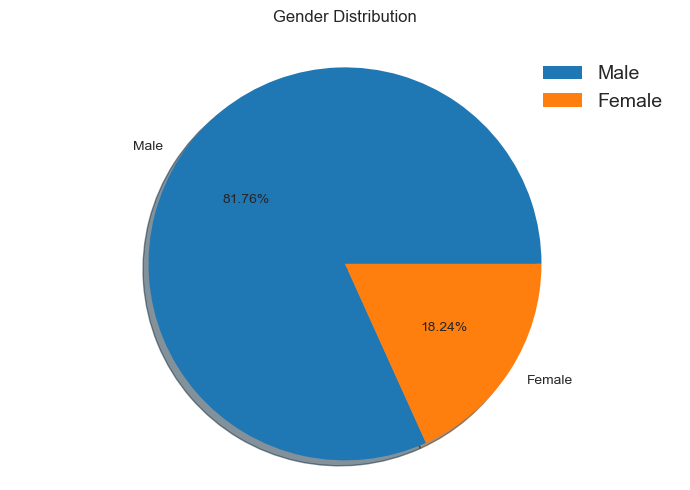

In [22]:
plt.figure(figsize=(7,5))
plt.pie(loanpred['Gender'].value_counts(), labels=loanpred['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

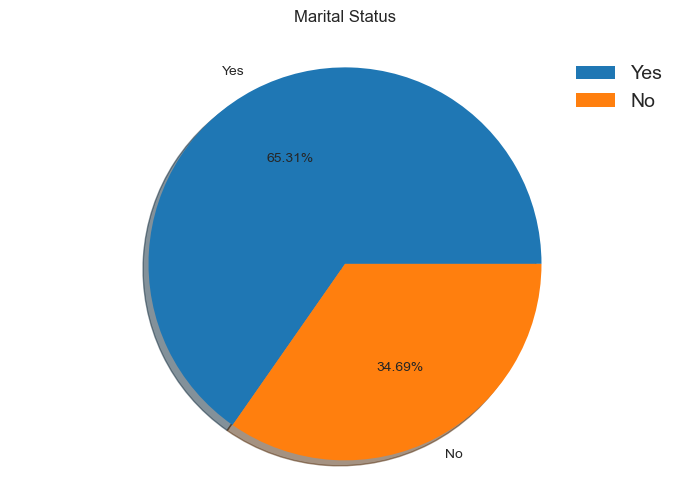

In [23]:
plt.figure(figsize=(7,5))
plt.pie(loanpred['Married'].value_counts(), labels=loanpred['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

 65.14% of people who need loan are married and only 34.86% are unmarried.

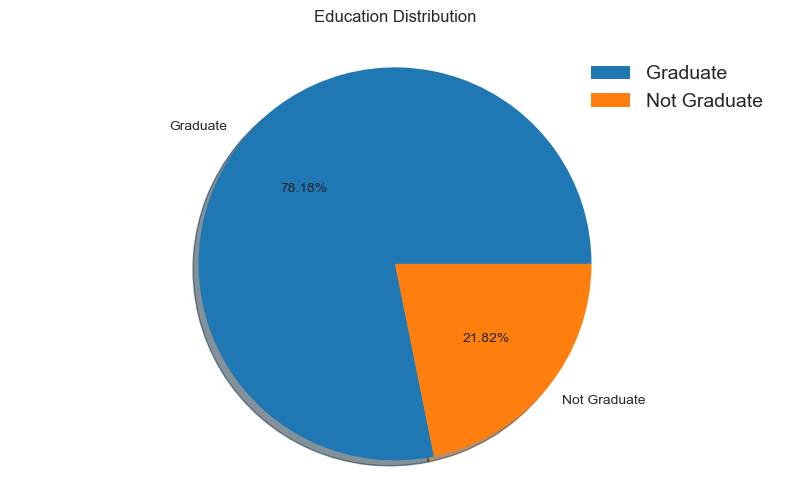

In [24]:
plt.figure(figsize=(8,5))
plt.pie(loanpred['Education'].value_counts(), labels=loanpred['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

78.18% of people who need loan are graduates and only 21.82% are not graduates

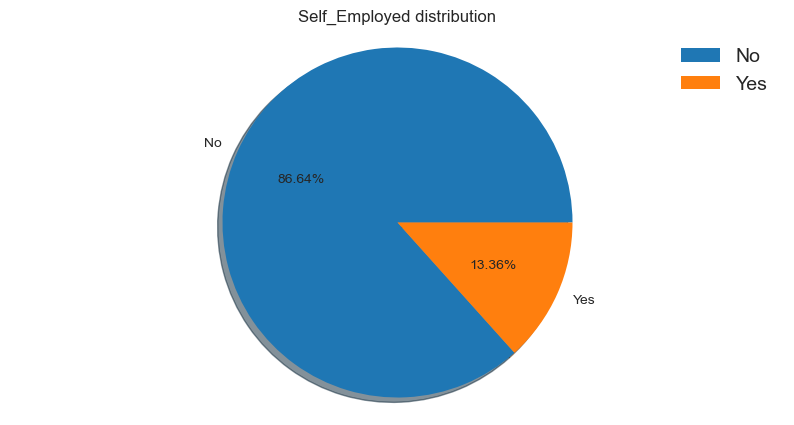

In [25]:
plt.figure(figsize=(10,5))
plt.pie(loanpred['Self_Employed'].value_counts(),labels=loanpred['Self_Employed'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Self_Employed distribution')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.show()

86.64% of people who need loan are not self-employed and only 13.36% are self-employed

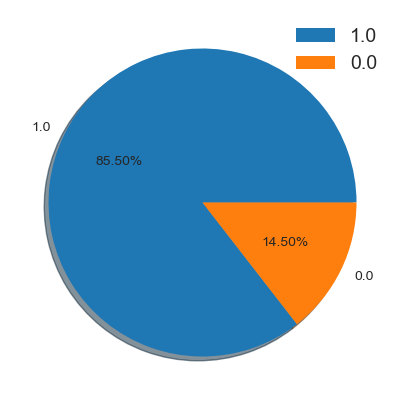

In [26]:
plt.figure(figsize=(10,5))
plt.pie(loanpred['Credit_History'].value_counts(),labels=loanpred['Credit_History'].value_counts().index,
        shadow=True, autopct='%1.2f%%')
plt.title=('Credit History Details')
plt.legend(prop={'size':14})
plt.show()

The credit history of 85.5% of those who need loan is 1.0

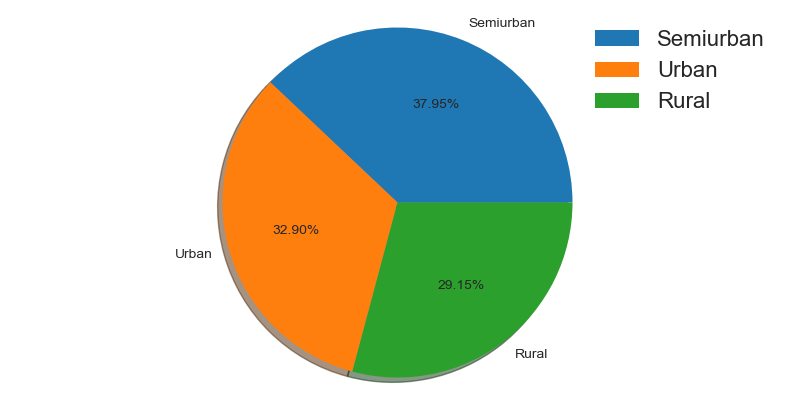

In [27]:
plt.figure(figsize=(10,5))
plt.pie(loanpred['Property_Area'].value_counts(),labels=loanpred['Property_Area'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title=('Property_Area Distribution')
plt.legend(prop={'size':16})
plt.axis('equal')
plt.show()

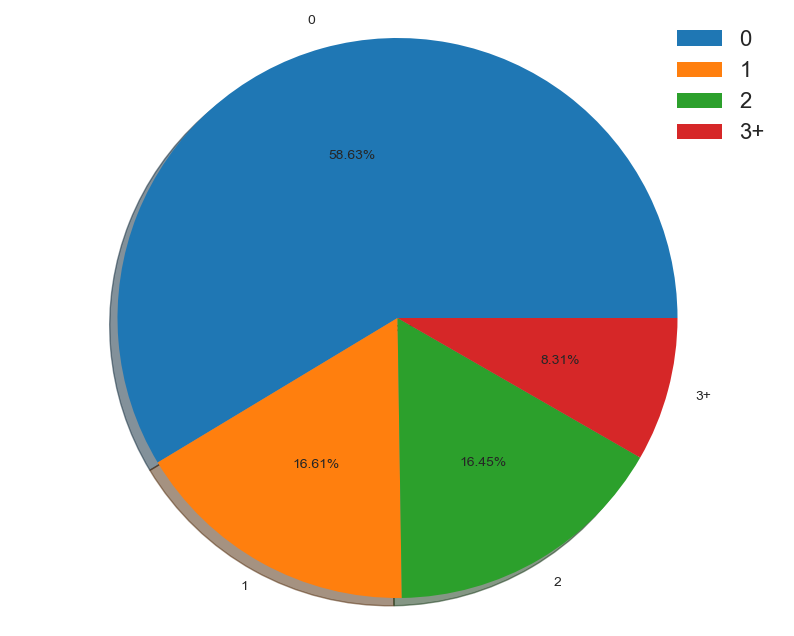

In [28]:
plt.figure(figsize=(10,8))
plt.pie(loanpred['Dependents'].value_counts(),labels=loanpred['Dependents'].value_counts().index,
       shadow=True, autopct='%1.2f%%') 
plt.title=('Dependents distributor')
plt.legend(prop={'size':16})
plt.axis('equal')
plt.show()    

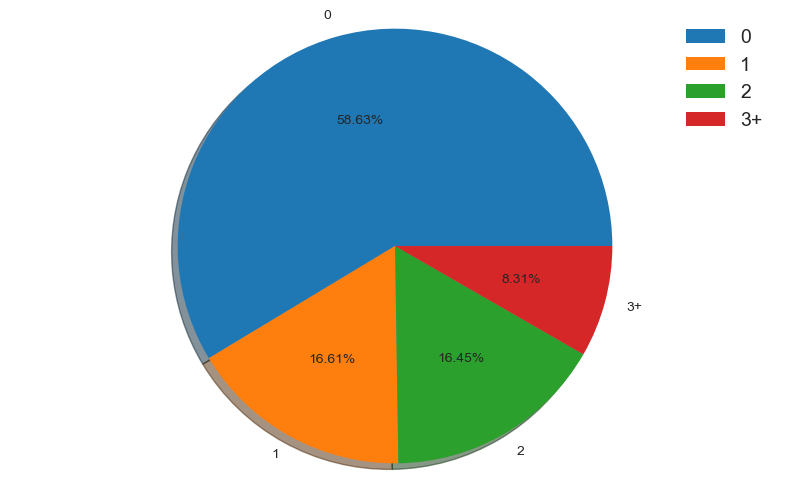

In [29]:
plt.figure(figsize=(8,5))
plt.pie(loanpred['Dependents'].value_counts(), labels=loanpred['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title=('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

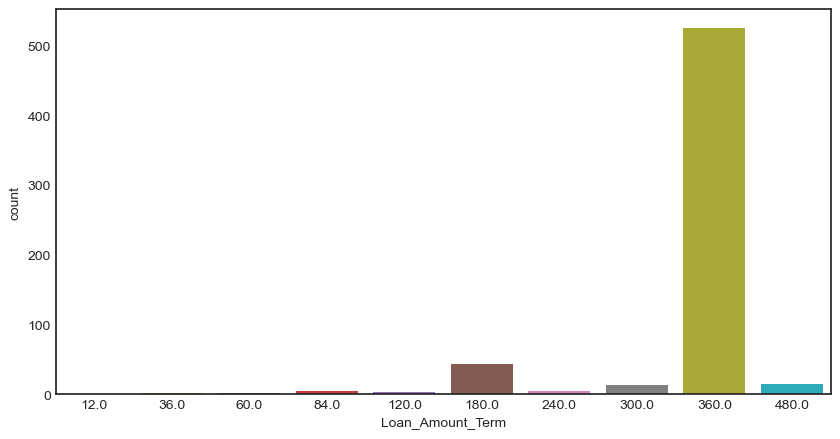

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=loanpred, x='Loan_Amount_Term')
plt.show()

Most areas are covered by value 360.0 in column 'Loan_Amount_term'

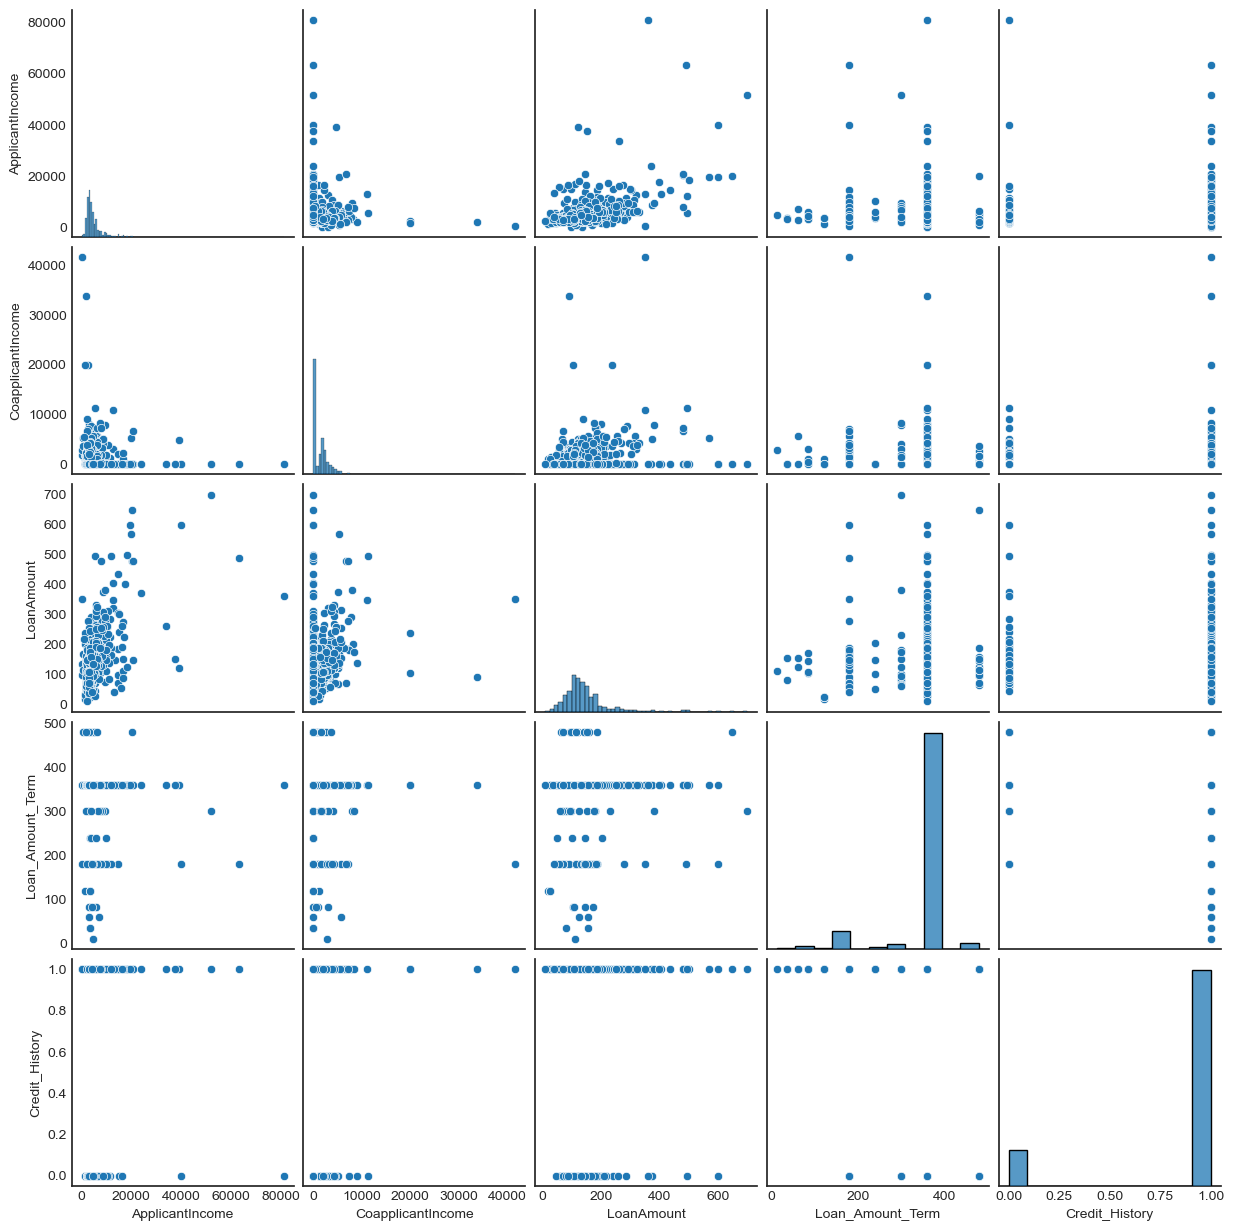

In [42]:
sns.pairplot(loanpred)
plt.show()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\3171882705.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

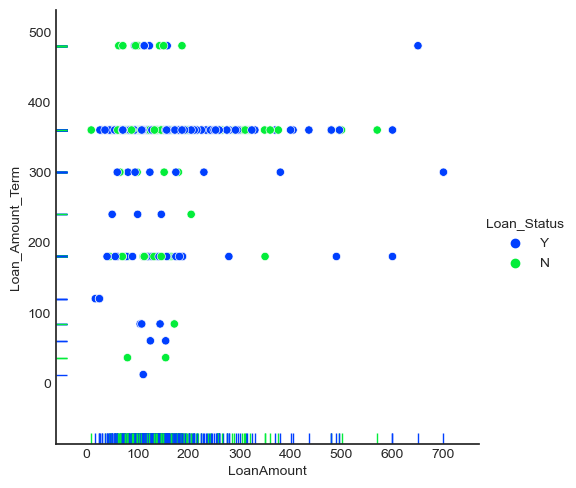

In [43]:
plt.style.use('seaborn-bright')
sns.relplot(data=loanpred, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=loanpred, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

Most loan applicants belong to 300 and to 400 and most of them have loan_status already

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

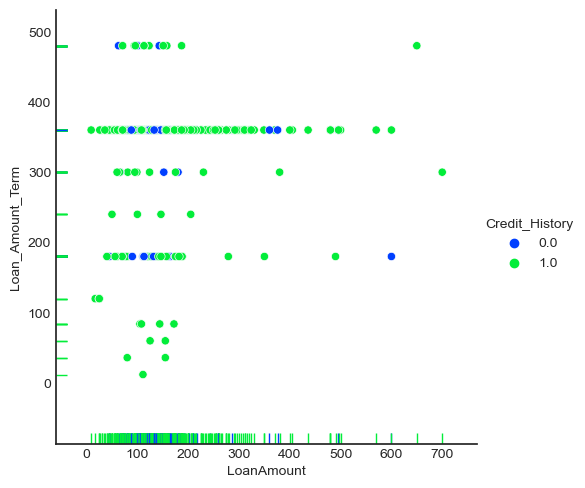

In [44]:
sns.relplot(data=loanpred, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=loanpred, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

Most of applicant has credit_history

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

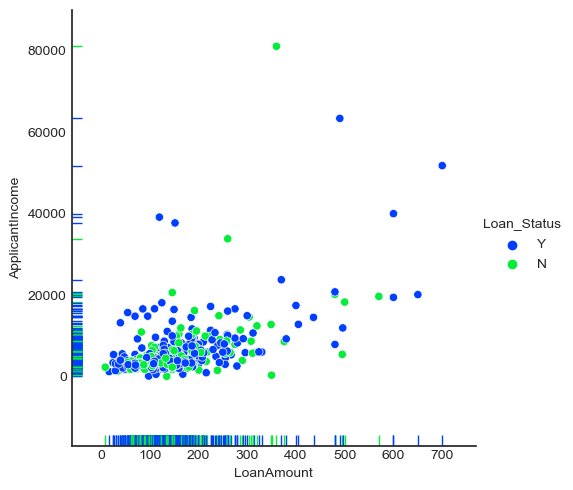

In [45]:
sns.relplot(data=loanpred, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=loanpred, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

Most applicants whose Loan amounts are between 0 and 300 have incomes between 0 to 20000

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

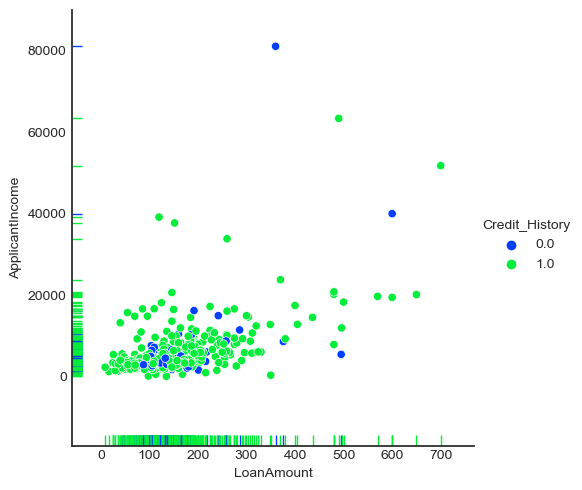

In [46]:
sns.relplot(data=loanpred, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=loanpred, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

Most applicants with the range of income 0 to 20000 and loan amounts range 0 to 400 have credit history 

<Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

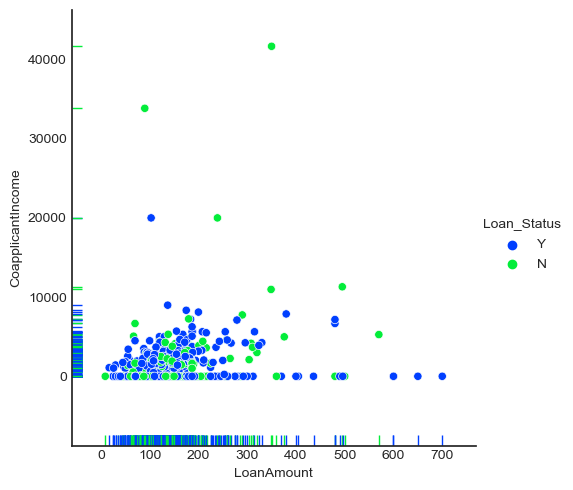

In [47]:
sns.relplot(data=loanpred, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=loanpred, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

Many applicants with loan amounts in the range of 0 to 400 got the loan and also got rejection

<Axes: xlabel='LoanAmount', ylabel='CoapplicantIncome'>

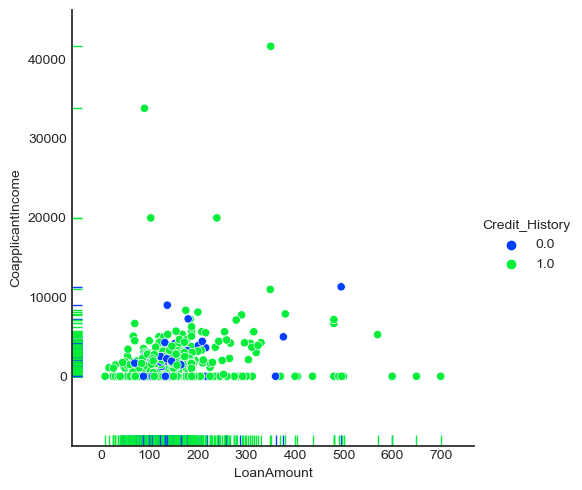

In [49]:
sns.relplot(data=loanpred, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=loanpred, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

Most applicants who applied for loan have credit history.

# Encoding the catagorical object dataype columns

In [50]:
#labelEncoder
le=LabelEncoder()
loanpred['Loan_Status']=le.fit_transform(loanpred["Loan_Status"])

In [51]:
#ordinal Endocer

oe = OrdinalEncoder()
loanpred['Gender'] = oe.fit_transform(loanpred['Gender'].values.reshape(-1,1))
loanpred['Married'] = oe.fit_transform(loanpred['Married'].values.reshape(-1,1))
loanpred['Dependents'] = oe.fit_transform(loanpred['Dependents'].values.reshape(-1,1))
loanpred['Education'] = oe.fit_transform(loanpred['Education'].values.reshape(-1,1))
loanpred['Self_Employed'] = oe.fit_transform(loanpred['Self_Employed'].values.reshape(-1,1))
loanpred['Property_Area'] = oe.fit_transform(loanpred['Property_Area'].values.reshape(-1,1))
loanpred.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


# Boxplot

C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\2791044804.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


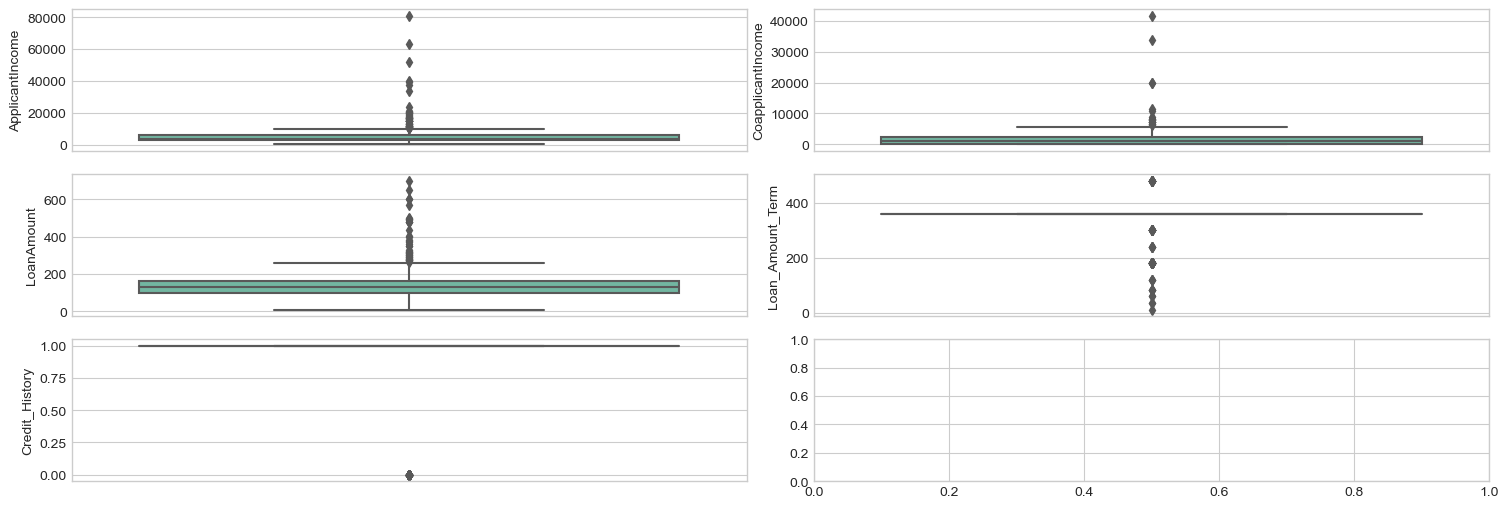

In [52]:
plt.style.use('seaborn-whitegrid')
fig, ax=plt.subplots(ncols=2, nrows=3 , figsize=(15,5))
index=0
ax=ax.flatten()
for col, value in loanpred[number_datatypes].items():
    sns.boxplot(y=col, data=loanpred, ax=ax[index],palette='Set2')
    
    index += 1
    
plt.tight_layout(pad=.4, w_pad=.4, h_pad=1)
plt.show()

C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\129830441.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
C:\Users\ENVY\anaconda3\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\129830441.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

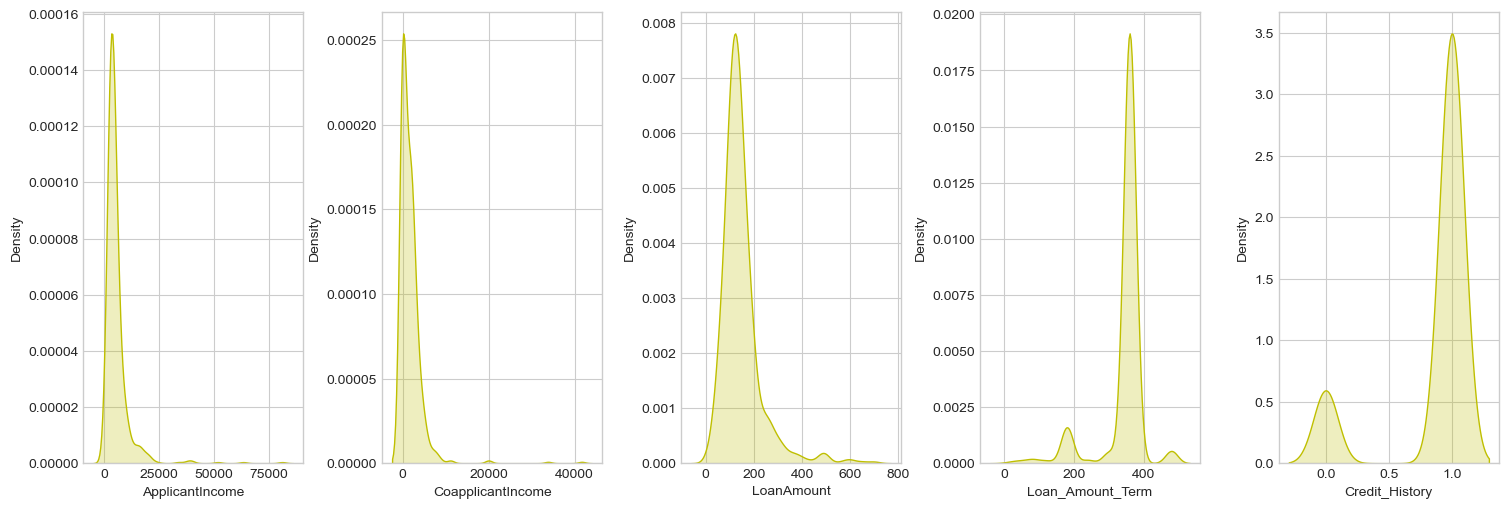

In [53]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in loanpred[number_datatypes].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

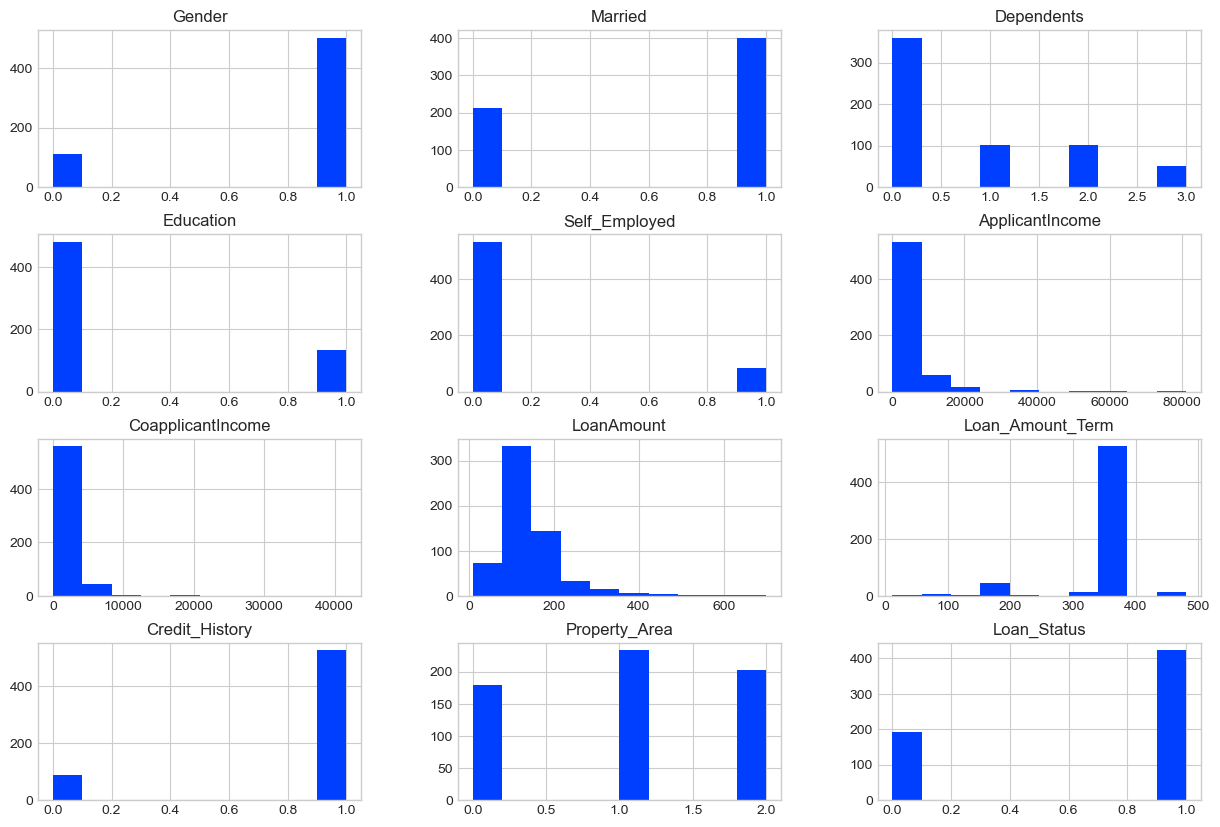

In [54]:
loanpred.hist(figsize=(15,10))
plt.show()

# Correlation using a Heatmap

C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\3068614264.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


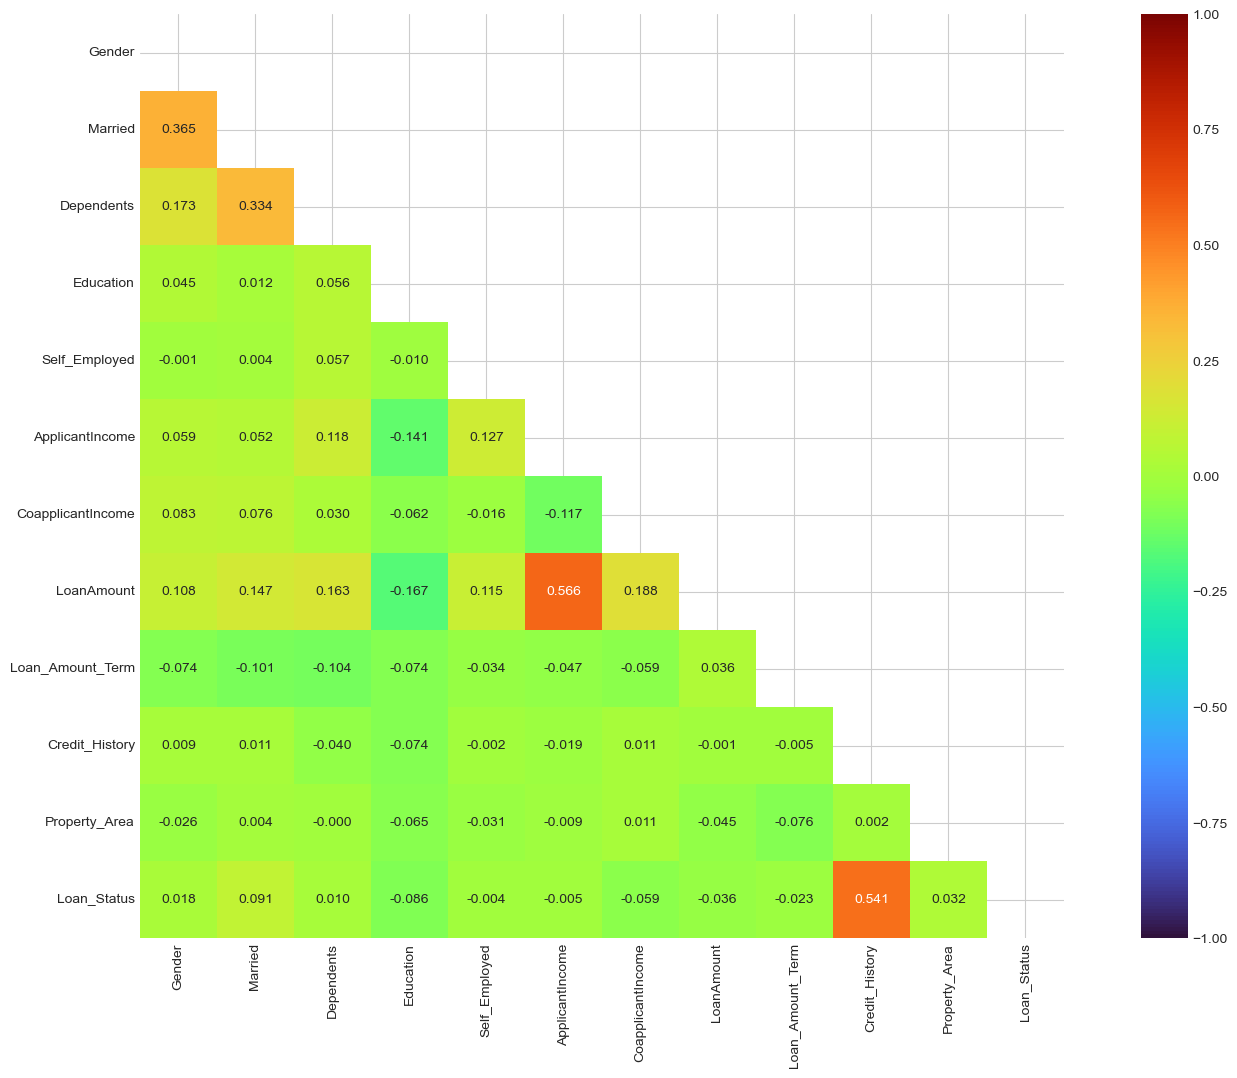

In [56]:
plt.style.use('seaborn-pastel')
upper_triangle=np.triu(loanpred.corr())
plt.figure(figsize=(20,12))
sns.heatmap(loanpred.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='.3f',
           annot_kws={'size':10}, cmap='turbo', mask=upper_triangle)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

There is no chances of multicollearnity from the heatmap above.

C:\Users\ENVY\AppData\Local\Temp\ipykernel_1608\2698293966.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


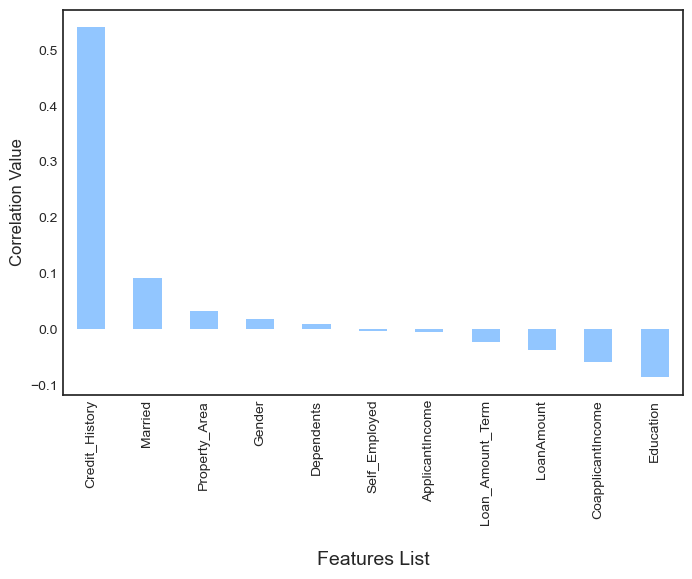

In [57]:
plt.style.use('seaborn-white')
loanpred_corr = loanpred.corr()
plt.figure(figsize=(8,5))
loanpred_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()


# Using Zscore to remove out the outliers

In [58]:
z=np.abs(zscore(loanpred))
threashold=3
loanpred1=loanpred[(z<3).all(axis=1)]
loss=(loanpred.shape[0]-loanpred1.shape[0])/loanpred.shape[0]*100
loss

6.026058631921824

We have lost 6% data than can be afforded.

In [59]:
loanpred.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# Using Log Transformaation method to fix the skewness

In [61]:
for col in number_datatypes:
    if loanpred.skew().loc[col]>.55:
        loanpred[col]=np.log1p(loanpred[col])

In [63]:
loanpred.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [64]:
X=loanpred.drop('Loan_Status', axis=1)
Y=loanpred['Loan_Status']

In [65]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

The target / label is imbalanced and needs to be treated before building the model.

In [66]:
sm=SMOTE()
X,Y= sm.fit_resample(X,Y)

In [67]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

# Feature scaling

In [68]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.4816,-1.352771,-0.733941,-0.548238,-0.399222,0.549919,-1.089081,0.255696,0.254661,0.563992,1.231905
1,0.4816,0.776049,0.284990,-0.548238,-0.399222,0.159392,0.804297,-0.025465,0.254661,0.563992,-1.303502
2,0.4816,0.776049,-0.733941,-0.548238,2.689271,-0.518991,-1.089081,-1.406022,0.254661,0.563992,1.231905
3,0.4816,0.776049,-0.733941,1.917879,-0.399222,-0.758568,0.919876,-0.160380,0.254661,0.563992,1.231905
4,0.4816,-1.352771,-0.733941,-0.548238,-0.399222,0.590729,-1.089081,0.176871,0.254661,0.563992,1.231905
...,...,...,...,...,...,...,...,...,...,...,...
839,0.4816,0.776049,1.286785,1.876404,-0.399222,-0.962801,-1.089081,-0.307546,0.254661,0.563992,-1.303502
840,0.4816,-1.352771,-0.733941,0.647544,-0.399222,-0.956162,-0.175842,-1.016332,2.090141,-1.890419,0.578891
841,0.4816,0.776049,-0.652820,-0.548238,-0.399222,-0.260967,0.894410,-0.143820,0.254661,-1.890419,-1.303502
842,0.4816,-0.455335,-0.733941,1.917879,-0.399222,-0.369609,0.667927,-0.905728,0.254661,0.563992,-1.303502


# Finding Best Random state for building the Classification Model

In [75]:
maxAcc=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    Accuracy=(accuracy_score(pred,Y_test))*100
     
    if Accuracy>maxAcc:
        
        maxAcc=Accuracy
        maxRS=i
print('best accuracy score is ', maxAcc, 'best random state is ', maxRS)        

best accuracy score is  81.51658767772511 best random state is  647


,Importance
Features,
Credit_History,0.276
ApplicantIncome,0.165
LoanAmount,0.163
CoapplicantIncome,0.101
Property_Area,0.082
Dependents,0.055
Married,0.042
Education,0.039
Loan_Amount_Term,0.033


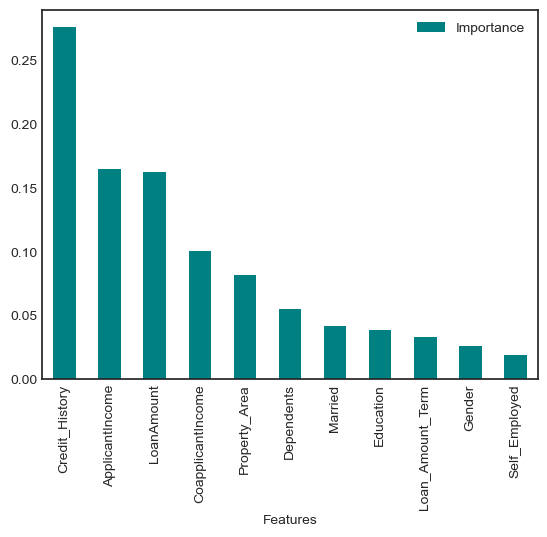

In [77]:
rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

# Machine Learning Model for Classification With Evaluation metrics

In [78]:
def classify(model,X,Y):
    X_test,X_train,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=501)
    
    #training the model
    model.fit(X_train,Y_train)
    
    #Predicting the Y_test
    pred=model.predict(X_test)
    
      #classifiction Report 
    classification=classification_report(pred,Y_test)
    print('classification report = ', classification)
    
    #Accuracy_score
    accuracy=accuracy_score(pred,Y_test)
    print('Accuracy_score ', accuracy)
    
    #cross validation score
    cross_val=(cross_val_score(model,X,Y,cv=5).mean())*100
    print('cross val score', cross_val)
    
    #Result
    print('accuracy - cross val =',accuracy-cross)

In [79]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=112)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [80]:
#LogisticRegression
model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.53      0.65       104
           1       0.67      0.92      0.77       107

    accuracy                           0.73       211
   macro avg       0.76      0.72      0.71       211
weighted avg       0.76      0.73      0.71       211

Accuracy Score: 72.51184834123224
Cross Validation Score: 72.86982248520711

Accuracy Score - Cross Validation Score is -0.3579741439748716


In [81]:
#Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67       104
           1       0.67      0.83      0.74       107

    accuracy                           0.71       211
   macro avg       0.72      0.71      0.71       211
weighted avg       0.72      0.71      0.71       211

Accuracy Score: 71.09004739336493
Cross Validation Score: 74.5280360664976

Accuracy Score - Cross Validation Score is -3.437988673132679


In [82]:
#Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       104
           1       0.75      0.73      0.74       107

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211

Accuracy Score: 73.93364928909952
Cross Validation Score: 77.49718230487461

Accuracy Score - Cross Validation Score is -3.563533015775093


In [83]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       104
           1       0.79      0.85      0.82       107

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

Accuracy Score: 81.04265402843602
Cross Validation Score: 83.53620738236124

Accuracy Score - Cross Validation Score is -2.493553353925222


In [84]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.58      0.66       104
           1       0.67      0.82      0.74       107

    accuracy                           0.70       211
   macro avg       0.71      0.70      0.70       211
weighted avg       0.71      0.70      0.70       211

Accuracy Score: 70.14218009478674
Cross Validation Score: 71.44195548041704

Accuracy Score - Cross Validation Score is -1.2997753856302978


In [85]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       104
           1       0.79      0.79      0.79       107

    accuracy                           0.79       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211

Accuracy Score: 79.14691943127961
Cross Validation Score: 83.06283460129613

Accuracy Score - Cross Validation Score is -3.9159151700165182


# Hyper Parameter Tuining on best classification ML model

In [87]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 739, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [88]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)

In [89]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 739, 1000]})

In [90]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 739}

In [91]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=100, n_jobs=-2, random_state=1000)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 85.78199052132702


# Aoc Roc Curve

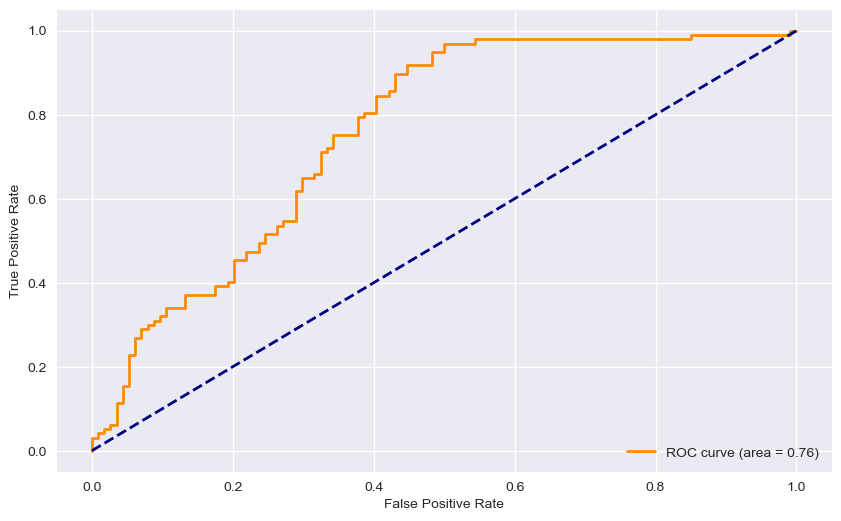

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Initialize and fit your model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Predict probabilities for the positive class
probs = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix

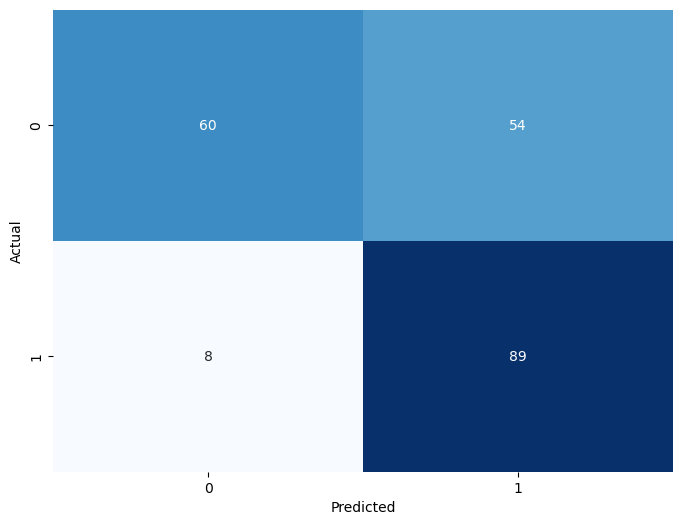

In [105]:
# Initialize and fit the model
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# Predictions
pred = lr.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Saving the model

In [106]:
filename='Loan_Application_status'
joblib.dump(Final_Model, filename)

['Loan_Application_status']